In [30]:
import pickle
import matplotlib.pyplot as plt
import sys

import pandas as pd

sys.path.append("../")
from utils.preprocessing import *

### predict using the model

In [31]:
[features, scaled_features] = np.load('../processed_data/features_video_exp_16.npy', allow_pickle=True)
with open('Z:/hsu/output/comprehensive_behavior_model.pkl', 'rb') as fr:
    model = pickle.load(fr)
predictions = model.predict(features)

In [32]:
behavior_nonest_cats = ['torso_groom', 'investigate_0', 'unsure_0', 'wall_rear_0', 'rear_0',
                        'unsure_2', 'rear', 'investigate_1', 'investigate_2', 'right_itch',
                        'investigate_3', 'sleep_scrunch_0', 'sleep_scrunch_1', 'wall_rear_1', 'right_body_groom',
                        'face_groom_1', 'dive_scrunch', 'head_groom', 'left_orient', 'left_investigate',
                        'face_groom_2', 'left_body groom', 'left_itch_1', 'left_itch_2', 'face_groom_3',
                        'paw_groom', 'locomotion', 'right_forepaw_orient', 'right_orient']

len(behavior_nonest_cats), model.n_classes_

(29, 29)

In [33]:
behavior_nonest_cats.index('face_groom_1')

15

In [34]:
behavior_nonest_merged = [6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 28]
len(behavior_nonest_merged)

16

In [35]:
total_counts = {key:  [] for key in [behavior_nonest_cats[j] 
                                     for j in behavior_nonest_merged]}

for i in behavior_nonest_merged:
    total_counts[behavior_nonest_cats[i]] = len(np.where(predictions==i)[0])

In [36]:
df_counts_100ms = pd.DataFrame(total_counts, index=[0])
df_counts_100ms.to_csv('../test_behavior_counts.csv', index=None)

In [37]:
total_loco = len(np.where(predictions==behavior_nonest_cats.index('locomotion'))[0])
total_contra = len(np.where(predictions==behavior_nonest_cats.index('contra_orient'))[0])

ValueError: 'contra_orient' is not in list

In [38]:
comp_loco_contra = [total_loco, total_contra]
plt.bar(np.arange(len(comp_loco_contra)), comp_loco_contra)

NameError: name 'total_contra' is not defined

### place side-by-side to visualize pattern

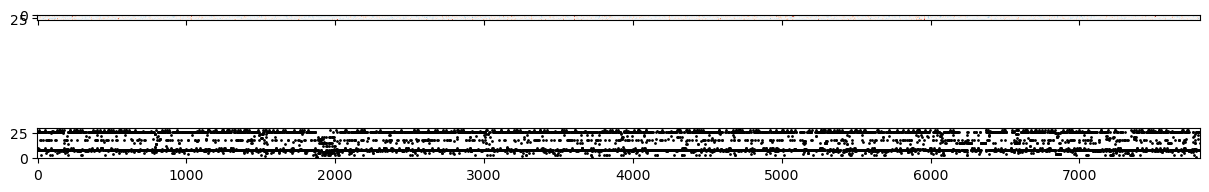

In [39]:
# plot scaled features with the corresponding predictions
fig, ax = plt.subplots(2, 1, figsize=(15, 3), gridspec_kw={'height_ratios': [6, 1]}, sharex=True)
# first 30 seconds
ax[0].imshow(scaled_features.T[:, ::10], vmin=-2, vmax=2, cmap='RdBu_r')
ax[1].scatter(np.arange(len(predictions[::10])), predictions[::10], s=1, color='k')
plt.show()

In [ ]:
predictions[:50]

In [28]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64),
 array([   4,   71,   20,  900,   70, 1167, 1088, 1432, 8964, 1233,  622,
          65,   16,   33,  288,  520,  273,  164, 2645,   76,  113,  203,
         401,  128,  115,   77, 5283, 1001, 2278], dtype=int64))

### Save processed file

In [29]:
np.save('Z:/KayCei/HDC/AH2-HET/120423-LIGHTS OFF/predict_video_exp_16.npy', predictions)

In [7]:
stim_on = 3
# in seconds, when did the animal perform behavior 2
behavior_times = np.where(predictions==stim_on)[0]/10
behavior_times

array([1.4000e+00, 1.6000e+00, 1.8000e+00, ..., 3.8817e+03, 3.8818e+03,
       3.8824e+03])

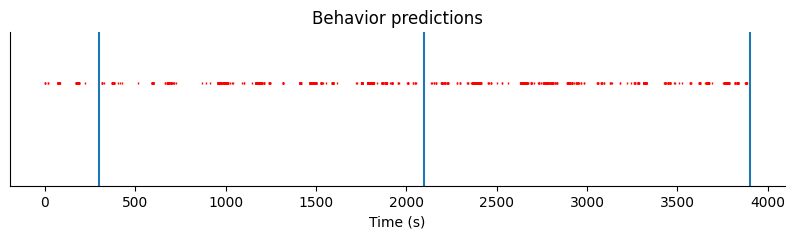

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
# ax.plot(onset_times,
#         np.ones_like(onset_times),
#         ls='', marker='|', markersize=1, c='k', alpha=1)
ax.plot(behavior_times,
        np.ones_like(behavior_times)+0.5,
        ls='', marker='|', markersize=1, c='r', alpha=1)
ax.set_yticks([])
ax.vlines(5*60, 0.5, 2)
ax.vlines(35*60, 0.5, 2)
ax.vlines(65*60, 0.5, 2)
ax.set_ylim([0.5, 2])

# ax.set_xlim([50, 100])
ax.set_title('Behavior predictions')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Time (s)')
plt.show()